# Cumulative shrub loss 
https://fireforge.wildfirecommons.org/dataset/clm-cumulative-shrub-cover-loss  


In [25]:
from pathlib import Path

fp = Path("../datasets/cumulative_shrub_loss")  

In [26]:
import rasterio
import rasterio.plot

tiff = rasterio.open(fp / "CumulShrubCoverLoss_19912020_202312_T1_v5.tif")
tiff.shape

(35324, 30468)

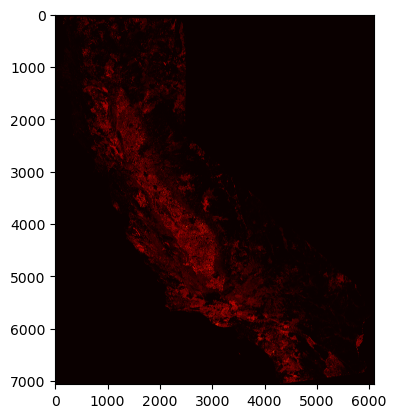

In [27]:
from rasterio.windows import Window
import matplotlib.pyplot as plt

with rasterio.open(fp / "CumulShrubCoverLoss_19912020_202312_T1_v5.tif") as src:
    data = src.read(1, out_shape=(1, int(src.height / 5), int(src.width / 5))) # can't load full image into memory
    temp = data
    temp[temp == -9999] = 0
    plt.imshow(temp, cmap="hot")
    plt.show()



In [28]:
src.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -9999.0,
 'width': 30468,
 'height': 35324,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["NAD83 / California Albers",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",0],PARAMETER["longitude_of_center",-120],PARAMETER["standard_parallel_1",34],PARAMETER["standard_parallel_2",40.5],PARAMETER["false_easting",0],PARAMETER["false_northing",-4000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3310"]]'),
 'transform': Affine(30.0, 0.0, -373979.99999999814,
        0.0, -30.0, 455280.0)}

In [29]:
import numpy as np
not_null = data[data != -9999]

not_null.min(), np.median(not_null), not_null.max()

(np.float32(0.0), np.float32(0.0), np.float32(1.59))

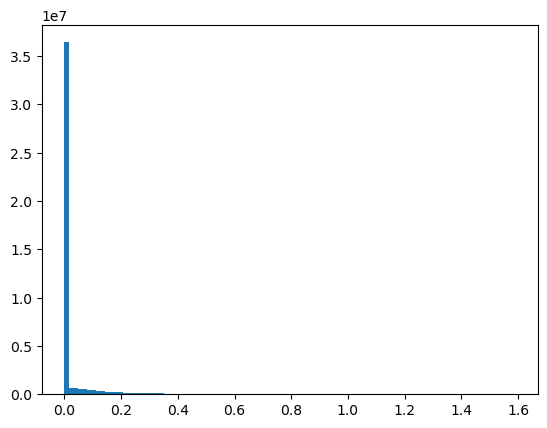

In [30]:
import matplotlib.pyplot as plt

plt.hist(not_null, bins=100)
plt.show()

More than 100% vegetation cover loss can occur if vegetation regrew, although it is fairly rare.

In [31]:
(not_null > 1).sum()

np.int64(736)

Provided data description:  
- Metric Name: Cumulative Shrub Cover Loss - Tier: 1 - Data Vintage: 12/2020 - Unit Of Measure: Cumulative fractional non-overlapping absolute shrub cover loss, where shrub cover is a continuous variable from 0 to 1. Cumulative loss can exceed 1 in cases with multiple disturbances. - Metric Definition and Relevance: The cumulative loss of shrub cover over a 30-year period (1992-2020). Shrub cover loss reflects fires, harvest/management and dieoff. Only disturbances that are sufficient to trigger the Continuous Change Detection and Classification algorithm are included; low-level, diffuse dieoff is likely missed. - Creation Method: Vegetation disturbances were identified over the Landsat TM/ETM+/OLI era using the Continuous Change Detection and Classification algorithm (CCDC). The corresponding annual change in shrub cover was determined with machine learning (Random Forest) using the National Land Cover Database for training and Landsat/CCDC observations as predictors; this produced a ~35-year stack of rasters that identified the locations and severity of shrub cover loss. This stack was then summed for 1992-2021 to calculate the cumulative tree cover loss over a 30-year period. See https://doi.org/10.1029/2021AV000654 for further information.